## Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Read the data

In [2]:
# Read the data set

pd.set_option('display.max_columns', 100)
encoding_latin="latin"
airbnb = pd.read_csv('D:/DataSets/AB_NYC_2019.csv', low_memory = False, encoding = encoding_latin)
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
airbnb.shape

(48895, 16)

In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [6]:
# Check the null values

airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# Check the missing percentage

missing = round(100*(airbnb.isnull().sum()/len(airbnb)), 2)
missing

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

## Clean the data

In [8]:
# Drop the rows with null values from column name and host_name

airbnb2019 = airbnb.dropna(subset=['name', 'host_name'], axis = 0)

In [9]:
# Fill the null values with '0'

airbnb2019.fillna(0, inplace=True)

In [10]:
# Fill the null values with '0' selecting column wise

#airbnb2019.fillna({'last_review':0}, inplace=True)
#airbnb2019.fillna({'reviews_per_month':0}, inplace=True)

In [11]:
airbnb2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [12]:
airbnb2019.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.0,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,0,0.0,1,23


In [13]:
# Recheck the null values

airbnb2019.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [14]:
airbnb2019.shape

(48858, 16)

In [15]:
# Drop the columns which are not required

airbnb2019.drop(['id','host_name','last_review'], axis = 1, inplace = True)
airbnb2019.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [16]:
# Get the unique values of the df

airbnb2019.nunique()

name                              47884
host_id                           37425
neighbourhood_group                   5
neighbourhood                       221
latitude                          19039
longitude                         14716
room_type                             3
price                               674
minimum_nights                      108
number_of_reviews                   394
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [17]:
# Now get the column wise unique values
# For neighbourhood_group

airbnb2019.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [18]:
# For neighbourhood

airbnb2019.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [19]:
# For room_type

airbnb2019.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## Visualize the data set

In [20]:
# Sort the data set on the basis of number of reviews to get maximum reviews

airbnb2019.sort_values(by='number_of_reviews', ascending=False).head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173


In [21]:
# Sort the data set on the basis of reviews_per_month to get the maximum

airbnb2019.sort_values(by='reviews_per_month', ascending=False).head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
42075,Enjoy great views of the City in our Deluxe Room!,244361589,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,58.50,9,299
42076,Great Room in the heart of Times Square!,244361589,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,27.95,9,299
38870,Lou's Palace-So much for so little,228415932,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,20.94,1,134
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,19.75,3,26
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,17.82,3,25


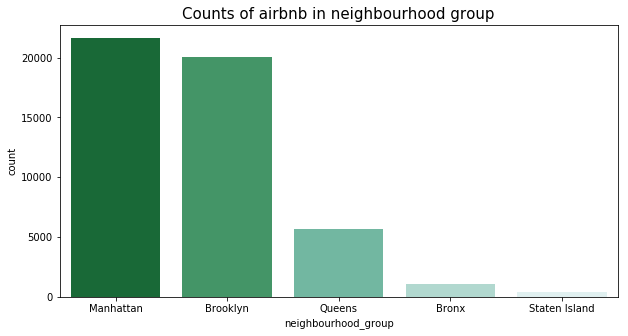

In [22]:
# Counts of airbnb in neighbourhood group

plt.figure(figsize=(10, 5))
plt.title('Counts of airbnb in neighbourhood group', fontsize=15)
sns.countplot(x='neighbourhood_group', data=airbnb2019, order=airbnb2019['neighbourhood_group'].value_counts().index,palette='BuGn_r')

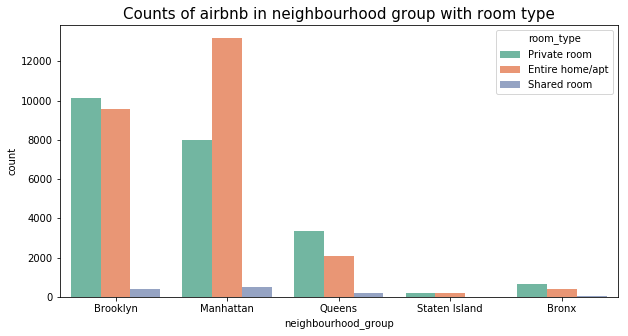

In [23]:
# Counts of airbnb in neighbourhood group with room type

plt.figure(figsize=(10, 5))
plt.title('Counts of airbnb in neighbourhood group with room type', fontsize=15)
sns.countplot(x='neighbourhood_group', data=airbnb2019, hue='room_type',palette="Set2")

In [24]:
# Top neighbourhoods with room type

# Top 10
top_neigh = airbnb2019['neighbourhood'].value_counts().reset_index().head(10)

# Get top 10 neighbourhood names

top_neigh = top_neigh['index'].tolist()

[Text(0, 0, 'Midtown'),
 Text(0, 0, 'Harlem'),
 Text(0, 0, 'Bedford-Stuyvesant'),
 Text(0, 0, "Hell's Kitchen"),
 Text(0, 0, 'Upper West Side'),
 Text(0, 0, 'Williamsburg'),
 Text(0, 0, 'Crown Heights'),
 Text(0, 0, 'East Village'),
 Text(0, 0, 'Bushwick'),
 Text(0, 0, 'Upper East Side')]

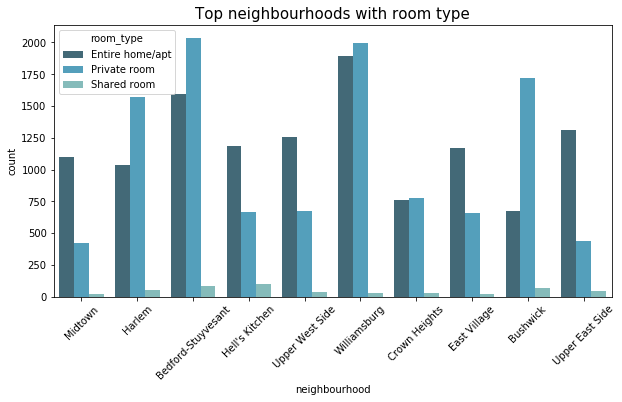

In [25]:
plt.figure(figsize=(10, 5))
plt.title('Top neighbourhoods with room type', fontsize=15)
viz = sns.countplot(x='neighbourhood', data=airbnb2019.loc[airbnb2019['neighbourhood'].isin(top_neigh)],hue='room_type', palette='GnBu_d')
viz.set_xticklabels(viz.get_xticklabels(), rotation=45)

In [26]:
# Price distribution by negihbourhood group

airbnb2019['price'].describe()

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

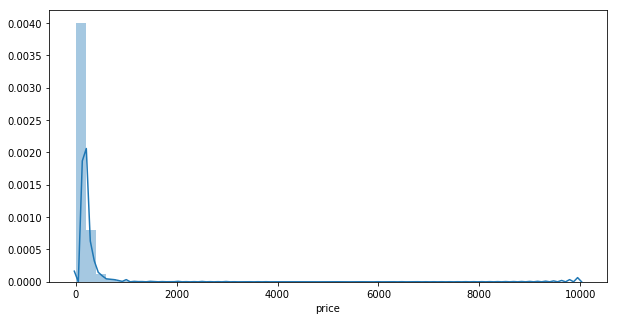

In [27]:
plt.figure(figsize=(10, 5))
sns.distplot(airbnb2019['price'])

In [28]:
airbnb2019['price'].quantile(.98)

550.0

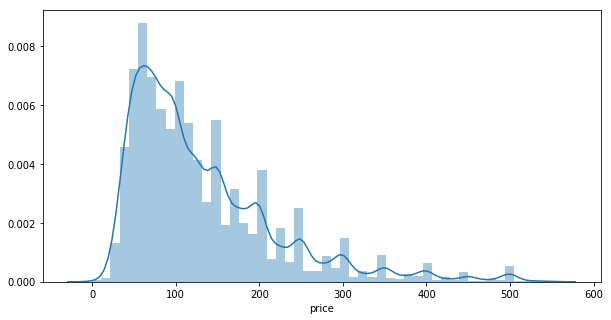

In [29]:
plt.figure(figsize=(10, 5))
sns.distplot(airbnb2019[airbnb2019['price'] < 550]['price'])

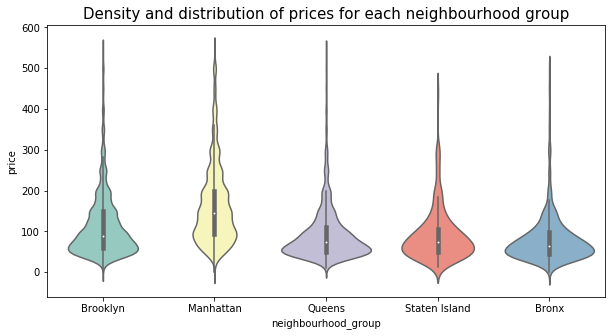

In [30]:
plt.figure(figsize=(10, 5))
plt.title('Density and distribution of prices for each neighbourhood group', fontsize=15)
sns.violinplot(x='neighbourhood_group', y='price', data=airbnb2019[airbnb2019['price'] < 550], palette='Set3')

In [31]:
# Let's examine detail stats by neighbourhood group for better understanding
# pandas.DataFrame.loc = Access a group of rows and columns by label(s) or a boolean array

# Brooklyn
sub_1_brooklyn = airbnb2019.loc[airbnb2019['neighbourhood_group'] == 'Brooklyn']
price_sub_1 = sub_1_brooklyn[['price']]

# Manhattan
sub_2_manhattan = airbnb2019.loc[airbnb2019['neighbourhood_group'] == 'Manhattan']
price_sub_2 = sub_2_manhattan[['price']]

# Queeens
sub_3_queens = airbnb2019.loc[airbnb2019['neighbourhood_group'] == 'Queens']
price_sub_3 = sub_3_queens[['price']]

# Staten Island
sub_4_staten = airbnb2019.loc[airbnb2019['neighbourhood_group'] == 'Staten Island']
price_sub_4 = sub_4_staten[['price']]

# Bronx
sub_5_bronx = airbnb2019.loc[airbnb2019['neighbourhood_group'] == 'Bronx']
price_sub_5 = sub_5_bronx[['price']]

price_list_by_group = [price_sub_1, price_sub_2, price_sub_3, price_sub_4, price_sub_5]

In [32]:
# Integrate all individual stats into dataframe

integ_price_stats_list = []
neigh_groups = airbnb2019['neighbourhood_group'].unique().tolist()

for price_group, group_name in zip(price_list_by_group, neigh_groups):
    # count / mean / std / 25% / 50% / 75% / max
  stats = price_group.describe()
    # mean / std / 25% / 50% / 75% / max
  stats = stats.iloc[1:]  
  stats.reset_index(inplace=True)
  stats.rename(columns={'index': 'Stats', 'price': group_name}, inplace=True)
  stats.set_index('Stats', inplace=True)
  integ_price_stats_list.append(stats)

price_stats_df = pd.concat(integ_price_stats_list, axis=1)
price_stats_df.T

Stats,mean,std,min,25%,50%,75%,max
Brooklyn,124.410523,186.936694,0.0,60.0,90.0,150.0,10000.0
Manhattan,196.897473,291.489822,0.0,95.0,150.0,220.0,10000.0
Queens,99.536017,167.128794,10.0,50.0,75.0,110.0,10000.0
Staten Island,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0
Bronx,87.469238,106.798933,0.0,45.0,65.0,99.0,2500.0


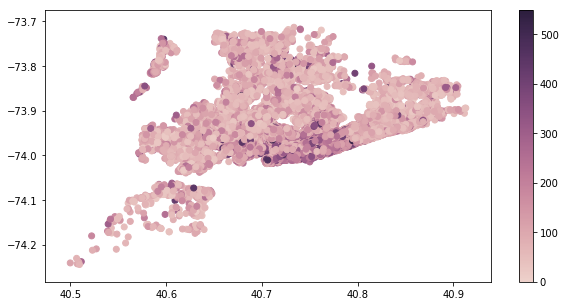

In [33]:
cmap = sns.cubehelix_palette(as_cmap=True)

wo_extreme = airbnb2019[airbnb2019['price'] < 550]

f, ax = plt.subplots()
f.set_size_inches(10, 5)
points = ax.scatter(wo_extreme['latitude'], wo_extreme['longitude'], c=wo_extreme['price'], cmap=cmap)
f.colorbar(points)

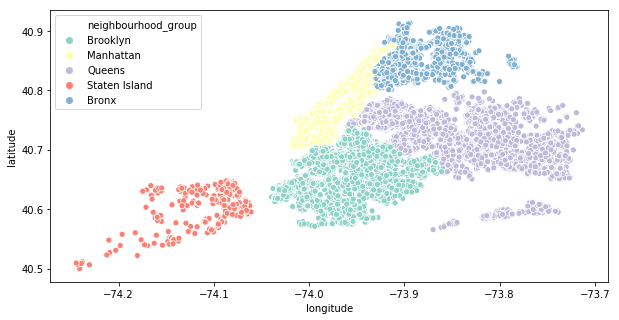

In [34]:
# Host location distribution

plt.figure(figsize=(10, 5))
sns.scatterplot(data=airbnb2019, x='longitude', y='latitude', hue='neighbourhood_group', palette='Set3')

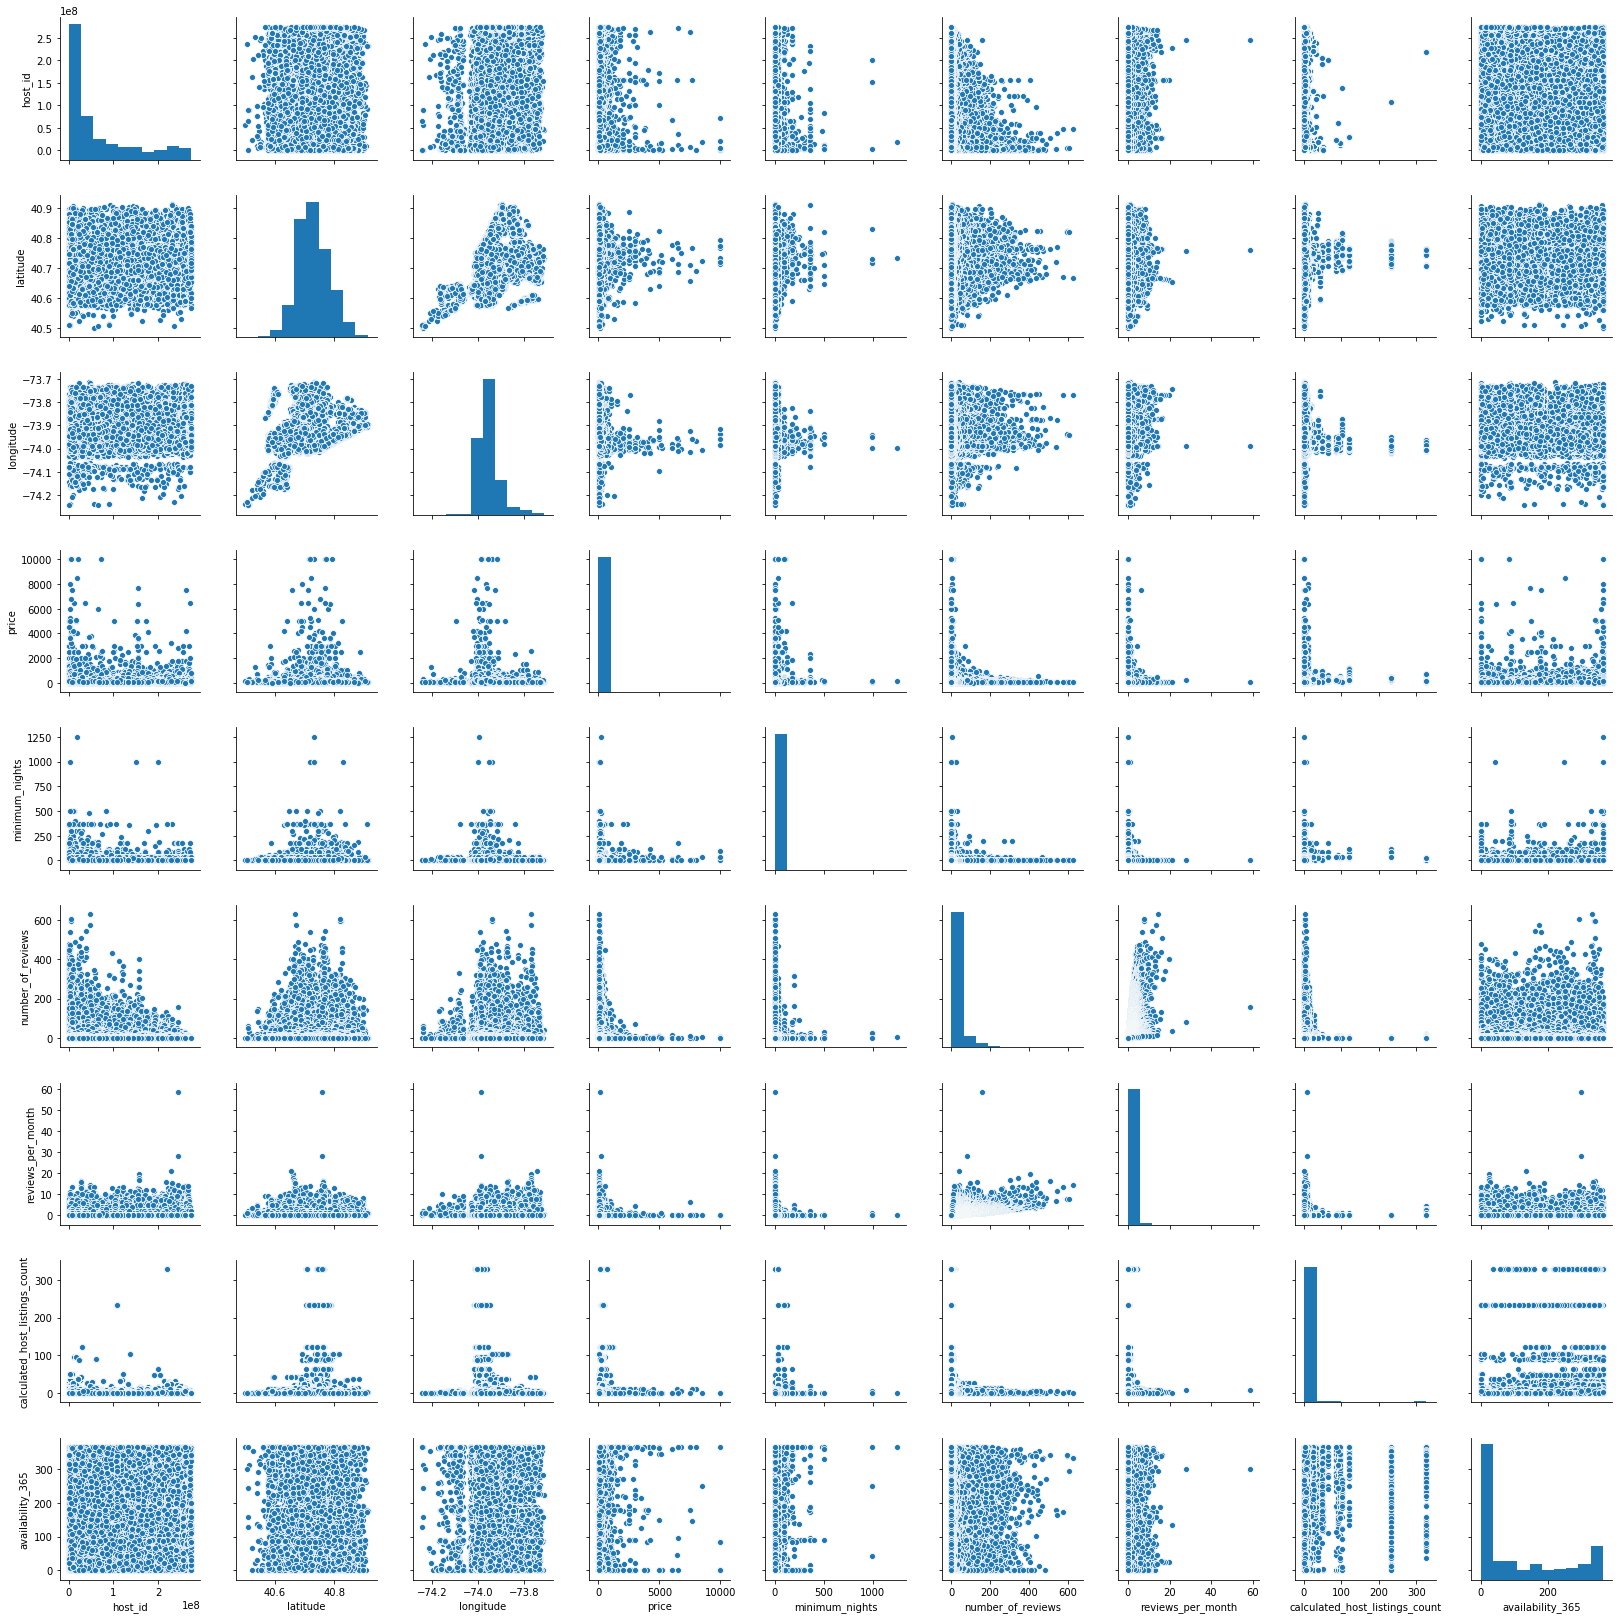

In [35]:
sns.pairplot(airbnb2019)

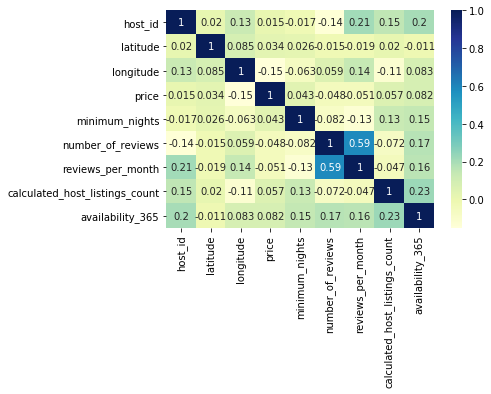

In [36]:
sns.heatmap(airbnb2019.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Model Building

In [37]:
# Encode the labels

from sklearn.preprocessing import LabelEncoder

In [38]:
airbnb2019.drop(['name'], inplace=True, axis=1)

# encodes categorical values
le = LabelEncoder()

le.fit(airbnb2019['neighbourhood_group'])
airbnb2019['neighbourhood_group'] = le.transform(airbnb2019['neighbourhood_group'])

le.fit(airbnb2019['neighbourhood'])
airbnb2019['neighbourhood'] = le.transform(airbnb2019['neighbourhood'])

le.fit(airbnb2019['room_type'])
airbnb2019['room_type'] = le.transform(airbnb2019['room_type'])

airbnb2019.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2845,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,4632,2,94,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,4869,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,7192,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0


### Generic Steps in model building using statsmodels

In [39]:
airbnb2019.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2845,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,4632,2,94,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,4869,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,7192,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0


In [97]:
X = airbnb2019.drop(['price', 'host_id', 'longitude', 'minimum_nights','calculated_host_listings_count'], inplace=False, axis=1)
y = airbnb2019['price']

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [99]:
# Let's now take a look at the train dataset

X_train.head()

,neighbourhood_group,neighbourhood,latitude,room_type,number_of_reviews,reviews_per_month,availability_365
45374,2,95,40.75445,0,8,5.45,252
23337,0,136,40.85152,0,2,0.16,93
40747,1,91,40.73444,0,3,0.53,209
835,1,214,40.70686,1,84,1.12,310
31918,1,151,40.67691,0,3,0.24,0


In [100]:
y_train.head()

45374    269
23337     48
40747    120
835      135
31918    139
Name: price, dtype: int64

### RFE ( Recursive Feature Elementation ) to eleminate 

In [101]:
colnames = X_train.columns
colnames

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'room_type',
       'number_of_reviews', 'reviews_per_month', 'availability_365'],
      dtype='object')

In [102]:
# Construct our Linear Regression model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X_train,y_train)
print(rfe)

Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True),
  n_features_to_select=1, step=1, verbose=3)


In [103]:
import statsmodels.api as sm

In [104]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [105]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const                 -3589.206387
neighbourhood_group       8.673560
neighbourhood             0.129326
latitude                 92.305327
room_type              -109.424582
number_of_reviews        -0.234382
reviews_per_month        -4.983733
availability_365          0.181995
dtype: float64

In [106]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     460.3
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:53:52   Log-Likelihood:            -2.6867e+05
No. Observations:               39086   AIC:                         5.374e+05
Df Residuals:                   39078   BIC:                         5.374e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3589.2064    